<a href="https://colab.research.google.com/github/mustapha786/BrightFieldImageDefectDetection/blob/main/Final_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms , models
from torchvision.utils import make_grid
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import albumentations as A
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Copy of images

In [ ]:
import shutil
import os
counter = 0

# define source and destination folders
src_folder = "/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject/Train/Defect"
dst_folder = "/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject1/Train/Defect"

for filename in os.listdir(src_folder):


    # construct full file path
      source = src_folder + "/" + filename
      destination = dst_folder + "/" + filename
    # copy the file to the destination folder
      shutil.copy(source, destination)
      counter = counter + 1
print("copied images =",counter)


# Selecting Right Transformation for the Augmentation

In [ ]:
transform = A.Compose([
     A.HorizontalFlip(p=0.5),  # 50% chance of horizontal flip. -- Yes
     A.VerticalFlip(p=0.5), #Yes
     A.RandomBrightnessContrast(p=0.7), # Yes
     A.Sharpen(alpha=(0.5,0.8),lightness=(0.5,1.0),always_apply=False,p=0.7), #- Yes - let us consider
     A.RandomToneCurve (scale=0.2, always_apply=False, p=0.5) # Yes
])

In [ ]:
#path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/Test/NoDefect'
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject1/Train/Defect'
original_image = 0
augmented_iamges = 0
img_names = []
for folder,subfolders,filenames in os.walk(path):

  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")
    original_image = original_image + 1
    #print(img1)

    #image = cv2.imread(folder+'/'+img)
    image = cv2.imread(path+'/'+img)


    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #plt.imshow(image)
    for i in range(2):
        augmented_image = transform(image=image)['image']
        #plt.imsave(folder+'/'+img1+f'_{i}.JPG', augmented_image)
        plt.imsave(path+'/'+img1+f'_{i}.JPG', augmented_image)
        augmented_iamges = augmented_iamges + 1

print("Original Image count:",original_image )
print("Augmented Image count:",augmented_iamges )


Original Image count: 97
Augmented Image count: 194


['DSC00555.JPG', 'DSC00469.JPG', 'DSC00340.JPG', 'DSC00589.JPG']
DSC00555.JPG


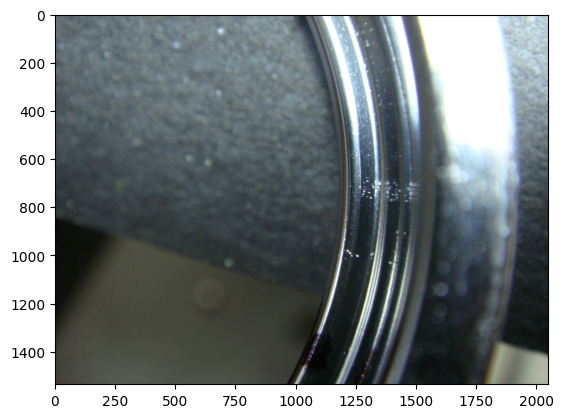

In [ ]:
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/Test/NoDefect'
for folder,subfolders,filenames in os.walk(path):
  print(filenames)
  for img in filenames:
    print(img)
    image =  cv2.imread(path+'/'+img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    break

## Use above code only for final augmentation

In [ ]:
# High Pass Filter

path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/'
img_names = []
kernel = np.array([[0.0, -1.0, 0.0],
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

#kernel = np.array([[-1.0, -1.0],
#                   [2.0, 2.0],
#                   [-1.0, -1.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")

    image = cv2.imread(folder+'/'+img)

    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


    #plt.imshow(image)
    for i in range(1):
        blur = cv2.GaussianBlur(image,(3,3),0)
        img_rst = cv2.filter2D(blur,-1,kernel)
        #augmented_image = transform(image=image)['image']
        plt.imsave(folder+'/'+img1+f'_{i}.JPG', img_rst)




In [ ]:
# Strong Laplacian filter

path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/'
img_names = []


kernel = np.array([[-1.0, -1.0, -1.0],
                   [-1.0, 8.0, -1.0],
                   [-1.0, -1.0, -1.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")

    image = cv2.imread(folder+'/'+img)

    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


    #plt.imshow(image)
    for i in range(1):
        img_rst = cv2.filter2D(image,-1,kernel)
        #augmented_image = transform(image=image)['image']
        plt.imsave(folder+'/'+img1+f'_{i}.JPG', img_rst)

In [ ]:
# Low Pass Filter

path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/'
img_names = []
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)




for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")

    image = cv2.imread(folder+'/'+img)

    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


    #plt.imshow(image)
    for i in range(1):
        img_rst = cv2.filter2D(image,-1,kernel)
        #augmented_image = transform(image=image)['image']
        plt.imsave(folder+'/'+img1+f'_{i}.JPG', img_rst)

In [ ]:
# Use Sobel Filter Filter

path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/'
img_names = []
kernel = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])


kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")

    image = cv2.imread(folder+'/'+img)

    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


    #plt.imshow(image)
    for i in range(1):
        img_rst = cv2.filter2D(image,-1,kernel)
        #augmented_image = transform(image=image)['image']
        plt.imsave(folder+'/'+img1+f'_{i}.JPG', img_rst)

In [ ]:
# Delete images
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/Test/NoDefect'
img_names = []
for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    #print(folder+'/'+img)
    #print(subfolders)
    #print(filenames)
    img1 = img
    img1=img.replace(".JPG","")
    if img1[-2] == '_':
      os.remove(folder+'/'+img)
      print("deleted successfully")

In [ ]:
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject2/'
img_names = []
for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    #print(folder+'/'+img)
    #print(subfolders)
    #print(filenames)
    img1 = img
    img1=img.replace(".JPG","")
    #if img1[-1] == 0 and img1[-2] == '_':
    print(img1[-1],img1[-2])
    #print(img1[-2])
    print(img1)

## Augment the training images

In [ ]:

transform = A.Compose([
    A.HorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    A.GaussianBlur(blur_limit=(0, 3), p=0.5),  # Gaussian blur with varying intensity
    A.RandomBrightnessContrast(p=0.2),
    A.CLAHE(clip_limit=100.0, tile_grid_size=(7,7),always_apply=False,p=0.5),
    A.ColorJitter(brightness=.1,contrast=0.2,saturation=0.9,always_apply=False,p=0.5),
    A.Downscale(scale_min=0.025,scale_max=0.25,interpolation=None,always_apply=False,p=0.5)
])

In [ ]:
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject1/'
img_names = []
for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    #print(folder+'/'+img)
    #print(subfolders)
    #print(filenames)
    img1 = img
    img1=img.replace(".JPG","")
    print(img1)

error: ignored

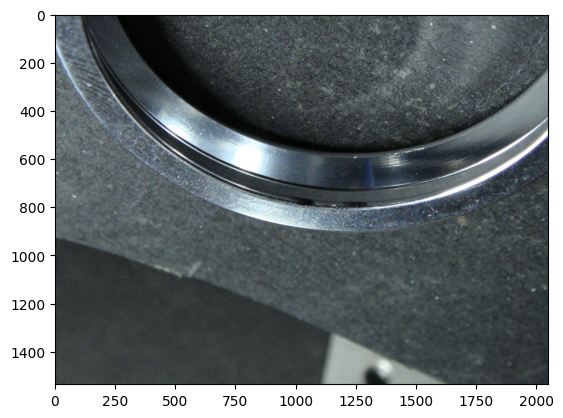

In [ ]:
path = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject1/'
img_names = []
for folder,subfolders,filenames in os.walk(path):
  for img in filenames:
    img1 = img
    img1=img.replace(".JPG","")

    image = cv2.imread(folder+'/'+img)

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #plt.imshow(image)
    for i in range(3):
        augmented_image = transform(image=image)['image']
        plt.imsave(folder+'/'+img1+f'_{i}.JPG', augmented_image)


## End Augmentation

In [ ]:
train_transform = transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.Resize(1024),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
root = '/content/drive/MyDrive/DeepLearning/ComputerVision/CVProject1'

In [ ]:
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
#train_data1 = datasets.ImageFolder(os.path.join(root,'Train'))
#test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

In [ ]:
len(train_data)

133

In [ ]:
len(train_data1)

133

In [ ]:
class_names = train_data.classes

In [ ]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
#test_loader = DataLoader(test_data,batch_size=10)

In [ ]:
for images,labels in train_loader:
  break


In [ ]:
images.shape

torch.Size([10, 3, 1536, 2048])

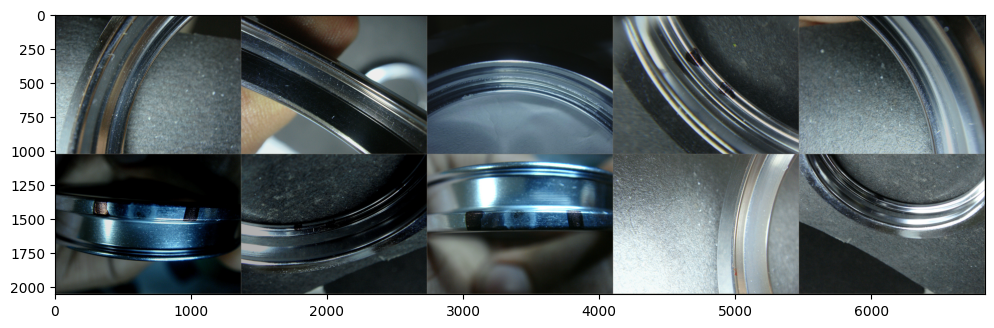

In [ ]:
im = make_grid(images,nrow=5)

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229 , -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

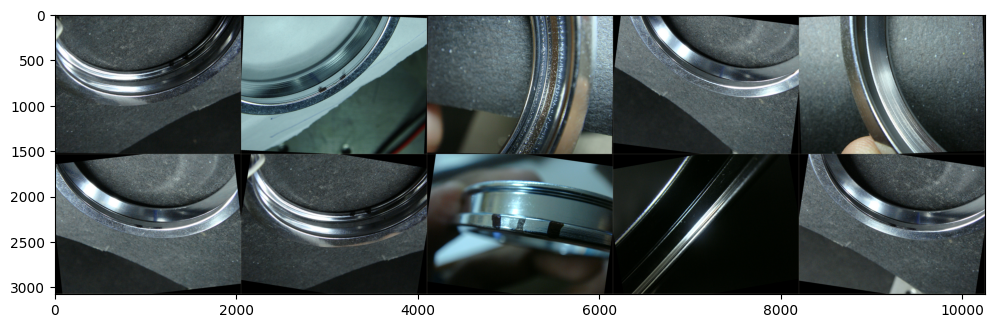

In [ ]:
im = make_grid(images,nrow=5)

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229 , -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(1024),
    transforms.RandomHorizontalFlip()
])